This notebook blurs an image using a Gaussian blur. We'll use numpy, the Python Image Library, and Matplotlib for this

You'll need to make sure these are installed on the Notebook server, or if you download the notebook or script, that they are installed on the machine you try to run on.

To get PIL, the current package name is "pillow"

In [11]:
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt

First we're going to load in an image, convert it into a single colour (greyscale), and resize it for convenience.

I am using an image of penguin (Photo by Pixabay from Pexels) but any jpg will work.

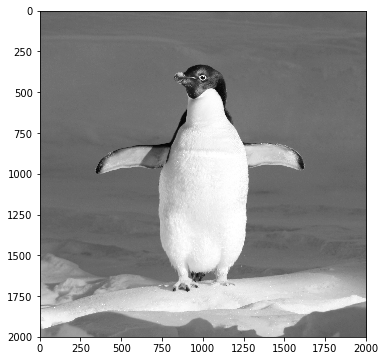

In [12]:
# CHANGE the image file on this line for a different image
img = Image.open('penguin.jpg').convert('L')

# We'll work with a resized version of this image
# If your image is not square, it will be squashed
dim = 2000
img_resized = img.resize((dim,dim))

# ... and convert it into a numpy array of floats
img_data = np.asarray(img_resized,dtype=float)

# Show the image
plt.figure(figsize = [6, 6])
plt.imshow(img_data,cmap='gray');


A simple image blur is done by convolving the image with a Gaussian, so we need to create one of the right size. Convolution is most-easily done by converting to Fourier space and multiplying, then converting back into real space.

In [13]:
#CHANGE this line to adjust blur amount. Higher is more blurred
width =  0.2

# Define a Gaussian in 1D on a grid with the same number of points as the image
domain = np.linspace(-5,5,dim)
gauss = np.exp(-0.5*domain**2/(width*width)) 
    
# Roll this around the 1D boundary so that the Gaussian is centered on grid 0,0
shift = int(dim/2)
gauss = np.roll(gauss,shift)

# Turn into a 2D Gaussian
gauss2D = gauss[:,np.newaxis] * gauss[np.newaxis,:]

In [14]:
# Fourier transform the image and the Gaussian using standard numpy functions
img_fft   = np.fft.fft2(img_data)
gauss_fft = np.fft.fft2(gauss2D)

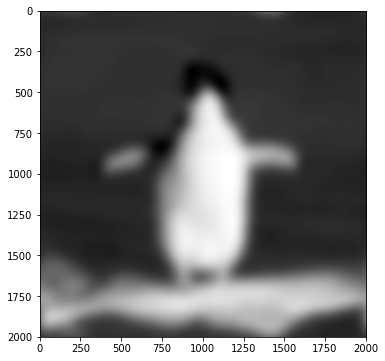

In [15]:
# Multiplication in Fourier space
img_conv = img_fft*gauss_fft
# Transform the result back into real space using the inverse transform
img_ifft = np.fft.ifft2(img_conv)

# Display the result of blurring the picture
plt.figure(figsize = [6, 6])
plt.imshow(img_ifft.real,cmap='gray');

In a real program we'd probably want to save this image somehow, or do some more processing here.